In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import networkit as nk
import numpy as np
import matplotlib.pyplot as plt
import time
import phate

from tqdm.notebook import tqdm
from sklearn.preprocessing import StandardScaler

from External.ICT.calculate_ICT import calculate_ICT, compute_widths
from External.clustering import k_means_pp
from External.generation import create_graph
from External.create_k_nearest import is_connected

plt.style.use('standard.mplstyle')

# Hyperparameters
mode = "K_Nearest+Density2"
metric = "euclidean"
position, labels = phate.tree.gen_dla(n_dim=2, n_branch=3,
                                            branch_length=2500, rand_multiplier=2, seed=37, sigma=1)
position = StandardScaler().fit_transform(position)
number_of_nodes = len(position)

In [3]:
# calculate the cluster centers and the components
ε, δ = 0.03, 0.1
r = 1 / (ε**2) * (int(np.log2(number_of_nodes - 1)) + 1 + np.log(1/δ))
k = int(np.sqrt(r))
k = np.min((k, number_of_nodes))
cluster_centers, labels = k_means_pp(k, position, metric=metric, return_labels=True)
unique_labels = np.unique(labels)


components = []
for label in unique_labels:
    component = np.argwhere(label == labels).T
    assert len(component) == 1
    components.append(component[0])

sub_ICTs = []
for component in tqdm(components):
    
    # othervise choose a smaller k above!
    assert len(component) > 6
    
    sub_number_of_nodes = len(component)
    sub_G, _ = create_graph(sub_number_of_nodes, mode, position=position[component], k=4)
    sub_G.indexEdges()
    k_ = int(np.sqrt(1 / (ε**2) * int(np.log2(sub_number_of_nodes - 1)) + 1 + np.log(1/δ)))
    k = np.min((sub_number_of_nodes, k_))
    sub_cluster_centers = k_means_pp(k, position[component], metric=metric)
    sub_ICT = calculate_ICT(sub_G, algorithm_type="exact_own", cluster_centers=sub_cluster_centers,
                                   zeros_stay_zeros=True, update_G=1.1)
    sub_ICT.indexEdges()
    sub_ICTs.append(sub_ICT)

sklearn is done: 2.6651556491851807
My own part is done: 0.034479379653930664



sklearn is done: 0.3133528232574463
My own part is done: 0.0013816356658935547


update Arr 173 -> 80
added 12 edges early
update Arr 80 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 77
added 2 edges early
update Arr 77 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 75
update Arr 75 -> 75
update Arr 75 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 72
update Arr 72 -> 72
update Arr 72 -> 71
update Arr 71 -> 71
update Arr 71 -> 70
update Arr 70 -> 70
update Arr 70 -> 69




sklearn is done: 0.14911365509033203
My own part is done: 0.0009112358093261719


update Arr 131 -> 58
added 9 edges early
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 56
update Arr 56 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 53
update Arr 53 -> 53
update Arr 53 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 50
update Arr 50 -> 50
update Arr 50 -> 49
added 2 edges early
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 48




sklearn is done: 0.3695862293243408
My own part is done: 0.001497507095336914


update Arr 222 -> 112
added 9 edges early
update Arr 112 -> 101
added 3 edges early
update Arr 101 -> 97
added 3 edges early
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 96
update Arr 96 -> 96
update Arr 96 -> 95
added 2 edges early
update Arr 95 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 93
update Arr 93 -> 92
update Arr 92 -> 91
update Arr 91 -> 91
update Arr 91 -> 90
update Arr 90 -> 90
update Arr 90 -> 89
update Arr 89 -> 89
update Arr 89 -> 88




sklearn is done: 0.2520310878753662
My own part is done: 0.0010776519775390625


update Arr 140 -> 66
added 6 edges early
update Arr 66 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 60
added 2 edges early
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 57
update Arr 57 -> 56
update Arr 56 -> 56
update Arr 56 -> 55
update Arr 55 -> 55
update Arr 55 -> 54




sklearn is done: 0.16714787483215332
My own part is done: 0.001056671142578125


update Arr 128 -> 56
added 12 edges early
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 53
update Arr 53 -> 53
update Arr 53 -> 52
update Arr 52 -> 52
update Arr 52 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 49




sklearn is done: 0.12121415138244629
My own part is done: 0.0007622241973876953


update Arr 94 -> 42
added 9 edges early
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 41
added 2 edges early
update Arr 41 -> 40
update Arr 40 -> 39
update Arr 39 -> 38
update Arr 38 -> 38
update Arr 38 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 36
added 5 edges early




sklearn is done: 0.2923135757446289
My own part is done: 0.0011456012725830078


update Arr 162 -> 72
added 8 edges early
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 66
added 2 edges early
update Arr 66 -> 65
added 2 edges early
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
update Arr 64 -> 63
added 10 edges early




sklearn is done: 0.19745874404907227
My own part is done: 0.0009074211120605469


update Arr 134 -> 55
added 14 edges early
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 52
added 2 edges early




sklearn is done: 0.37583184242248535
My own part is done: 0.0016255378723144531


update Arr 263 -> 116
added 21 edges early
update Arr 116 -> 114
update Arr 114 -> 114
update Arr 114 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 112
update Arr 112 -> 112
update Arr 112 -> 111
added 2 edges early
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 109
added 2 edges early
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 


sklearn is done: 0.36620497703552246
My own part is done: 0.0015056133270263672


update Arr 194 -> 89
added 15 edges early
update Arr 89 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 87
update Arr 87 -> 87
update Arr 87 -> 87
update Arr 87 -> 86
update Arr 86 -> 86
update Arr 86 -> 86
update Arr 86 -> 85
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 83
update Arr 83 -> 83
update Arr 83 -> 83
update Arr 83 -> 83
update Arr 83 -> 82
update Arr 82 -> 81
update Arr 81 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 7


sklearn is done: 0.12083005905151367
My own part is done: 0.0008115768432617188


update Arr 105 -> 46
added 8 edges early
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 44
update Arr 44 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 40
update Arr 40 -> 40
update Arr 40 -> 39




sklearn is done: 0.28576064109802246
My own part is done: 0.0011720657348632812


update Arr 150 -> 70
added 12 edges early
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 69
update Arr 69 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 63
update Arr 63 -> 63
update Arr 63 -> 62




sklearn is done: 0.13075685501098633
My own part is done: 0.0008385181427001953


update Arr 103 -> 46
added 9 edges early
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 41
update Arr 41 -> 40
added 10 edges early




sklearn is done: 0.2886812686920166
My own part is done: 0.0012021064758300781


update Arr 159 -> 71
added 10 edges early
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 69
update Arr 69 -> 68
update Arr 68 -> 68
update Arr 68 -> 67
added 2 edges early
update Arr 67 -> 67
update Arr 67 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 62




sklearn is done: 0.3480713367462158
My own part is done: 0.0014047622680664062


update Arr 188 -> 87
added 16 edges early
update Arr 87 -> 85
update Arr 85 -> 83
update Arr 83 -> 83
update Arr 83 -> 83
update Arr 83 -> 82
added 2 edges early
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 79
update Arr 79 -> 77
added 2 edges early
update Arr 77 -> 77
update Arr 77 -> 76
update Arr 76 -> 76
update Arr 76 -> 75




sklearn is done: 0.3058927059173584
My own part is done: 0.0013279914855957031


update Arr 162 -> 70
added 14 edges early
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 65
update Arr 65 -> 65
update Arr 65 -> 64




sklearn is done: 0.22482705116271973
My own part is done: 0.0012004375457763672


update Arr 135 -> 62
added 11 edges early
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
update Arr 60 -> 60
update Arr 60 -> 59
update Arr 59 -> 59
update Arr 59 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 57
added 2 edges early
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 56
update Arr 56 -> 55




sklearn is done: 0.37380480766296387
My own part is done: 0.0014655590057373047


update Arr 250 -> 114
added 15 edges early
update Arr 114 -> 113
added 2 edges early
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 112
update Arr 112 -> 112
update Arr 112 -> 112
update Arr 112 -> 112
update Arr 112 -> 112
update Arr 112 -> 112
update Arr 112 -> 112
update Arr 112 -> 112
update Arr 112 -> 112
update Arr 112 -> 112
update Arr 112 -> 112
update Arr 112 -> 112
update Arr 112 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 110
update Arr 110 -> 110
update Arr 110 -> 110
update Arr 110 -> 110
update Arr 110 -> 110
update Arr 110 -> 110
update Arr 110 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 108
update Arr 10


sklearn is done: 0.08393478393554688
My own part is done: 0.00046062469482421875


update Arr 42 -> 30
added 2 edges early
update Arr 30 -> 27
added 2 edges early
update Arr 27 -> 25
update Arr 25 -> 22
update Arr 22 -> 22
update Arr 22 -> 19
update Arr 19 -> 18
update Arr 18 -> 16




sklearn is done: 0.10200333595275879
My own part is done: 0.0007176399230957031


update Arr 90 -> 44
added 4 edges early
update Arr 44 -> 42
added 3 edges early
update Arr 42 -> 42
update Arr 42 -> 40
update Arr 40 -> 38
update Arr 38 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 33
update Arr 33 -> 33
update Arr 33 -> 32




sklearn is done: 0.19339203834533691
My own part is done: 0.0011935234069824219


update Arr 138 -> 60
added 11 edges early
update Arr 60 -> 60
update Arr 60 -> 59
update Arr 59 -> 59
update Arr 59 -> 58
update Arr 58 -> 58
update Arr 58 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 54
update Arr 54 -> 54
update Arr 54 -> 53




sklearn is done: 0.2663271427154541
My own part is done: 0.001140594482421875


update Arr 153 -> 69
added 10 edges early
update Arr 69 -> 68
update Arr 68 -> 67
update Arr 67 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 63
update Arr 63 -> 63
update Arr 63 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
update Arr 60 -> 60
update Arr 60 -> 59




sklearn is done: 0.3738086223602295
My own part is done: 0.0016226768493652344


update Arr 274 -> 126
added 17 edges early
update Arr 126 -> 120
added 3 edges early
update Arr 120 -> 120
update Arr 120 -> 120
update Arr 120 -> 120
update Arr 120 -> 120
update Arr 120 -> 120
update Arr 120 -> 120
update Arr 120 -> 120
update Arr 120 -> 120
update Arr 120 -> 120
update Arr 120 -> 120
update Arr 120 -> 120
update Arr 120 -> 120
update Arr 120 -> 120
update Arr 120 -> 120
update Arr 120 -> 120
update Arr 120 -> 120
update Arr 120 -> 120
update Arr 120 -> 120
update Arr 120 -> 119
update Arr 119 -> 119
update Arr 119 -> 119
update Arr 119 -> 119
update Arr 119 -> 119
update Arr 119 -> 118
update Arr 118 -> 118
update Arr 118 -> 118
update Arr 118 -> 117
update Arr 117 -> 117
update Arr 117 -> 117
update Arr 117 -> 117
update Arr 117 -> 117
update Arr 117 -> 117
update Arr 117 -> 117
update Arr 117 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 11


sklearn is done: 0.11022782325744629
My own part is done: 0.0006721019744873047


update Arr 85 -> 39
added 9 edges early
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 37
update Arr 37 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 35
update Arr 35 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 33




sklearn is done: 0.15380072593688965
My own part is done: 0.0009400844573974609


update Arr 118 -> 55
added 6 edges early
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 53
added 2 edges early
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 51
added 2 edges early
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 49
update Arr 49 -> 49
update Arr 49 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 47




sklearn is done: 0.13370800018310547
My own part is done: 0.0008573532104492188


update Arr 99 -> 42
added 5 edges early
update Arr 42 -> 41
update Arr 41 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 39
added 2 edges early
update Arr 39 -> 39
update Arr 39 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 37




sklearn is done: 0.37676429748535156
My own part is done: 0.0015406608581542969


update Arr 259 -> 110
added 21 edges early
update Arr 110 -> 110
update Arr 110 -> 110
update Arr 110 -> 110
update Arr 110 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 105
update Arr 


sklearn is done: 0.3542501926422119
My own part is done: 0.0014095306396484375


update Arr 191 -> 88
added 10 edges early
update Arr 88 -> 85
added 4 edges early
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 83
update Arr 83 -> 82
added 2 edges early
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 81
update Arr 81 -> 81
update Arr 81 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 79
update Arr 79 -> 78
added 2 edges early
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 77
update Arr 77 -> 76
update Arr 76 -> 76
update Arr 76 -> 75




sklearn is done: 0.33737635612487793
My own part is done: 0.0012793540954589844


update Arr 174 -> 82
added 8 edges early
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 81
added 2 edges early
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 80
update Arr 80 -> 80
update Arr 80 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 77
added 2 edges early
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77


sklearn is done: 0.36821961402893066
My own part is done: 0.0016896724700927734


update Arr 179 -> 85
added 11 edges early
update Arr 85 -> 83
update Arr 83 -> 83
update Arr 83 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 81
added 2 edges early
update Arr 81 -> 80
update Arr 80 -> 80
update Arr 80 -> 79
added 2 edges early
update Arr 79 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 76
added 2 edges early
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 75
update Arr 75 -> 75
update Arr 75 -> 74
update Arr 74 -> 74
update Arr 74 -> 73




sklearn is done: 0.10944271087646484
My own part is done: 0.0007071495056152344


update Arr 91 -> 46
added 4 edges early
update Arr 46 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 41
update Arr 41 -> 40
update Arr 40 -> 39
update Arr 39 -> 39
update Arr 39 -> 38
update Arr 38 -> 38
update Arr 38 -> 37
update Arr 37 -> 37
update Arr 37 -> 35
update Arr 35 -> 34




sklearn is done: 0.37459444999694824
My own part is done: 0.0015251636505126953


update Arr 215 -> 102
added 8 edges early
update Arr 102 -> 95
update Arr 95 -> 95
update Arr 95 -> 94
added 2 edges early
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 93
update Arr 93 -> 93
update Arr 93 -> 93
update Arr 93 -> 92
added 2 edges early
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 91
update Arr 91 -> 90
added 2 edges early
update Arr 90 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 


sklearn is done: 0.1411898136138916
My own part is done: 0.0008471012115478516


update Arr 109 -> 48
added 8 edges early
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 47
update Arr 47 -> 47
update Arr 47 -> 47
update Arr 47 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 43




sklearn is done: 0.25130438804626465
My own part is done: 0.0010411739349365234


update Arr 134 -> 63
added 11 edges early
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 61
update Arr 61 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 55
update Arr 55 -> 55
update Arr 55 -> 54




sklearn is done: 0.14593768119812012
My own part is done: 0.0007371902465820312


update Arr 112 -> 51
added 7 edges early
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 49
update Arr 49 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 47
update Arr 47 -> 47
update Arr 47 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 45




sklearn is done: 0.09702014923095703
My own part is done: 0.0005693435668945312


update Arr 77 -> 31
added 8 edges early
update Arr 31 -> 31
update Arr 31 -> 31
update Arr 31 -> 30
update Arr 30 -> 30
update Arr 30 -> 30
update Arr 30 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 28




sklearn is done: 0.2948019504547119
My own part is done: 0.0013191699981689453


update Arr 151 -> 62
added 13 edges early
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 59
update Arr 59 -> 58




sklearn is done: 0.11492753028869629
My own part is done: 0.0007464885711669922


update Arr 90 -> 46
added 3 edges early
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 43
update Arr 43 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 39
added 2 edges early
update Arr 39 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 37
update Arr 37 -> 36
update Arr 36 -> 36
update Arr 36 -> 35




sklearn is done: 0.04699444770812988
My own part is done: 0.0003523826599121094


update Arr 29 -> 23
added 2 edges early
update Arr 23 -> 20
update Arr 20 -> 18
update Arr 18 -> 16
update Arr 16 -> 15
update Arr 15 -> 14
update Arr 14 -> 14
update Arr 14 -> 12
update Arr 12 -> 11




sklearn is done: 0.1815791130065918
My own part is done: 0.0010232925415039062


update Arr 130 -> 58
added 11 edges early
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 53
added 2 edges early
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 52




sklearn is done: 0.3352820873260498
My own part is done: 0.0013396739959716797


update Arr 178 -> 78
added 14 edges early
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 76
added 2 edges early
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 71
added 9 edges early




sklearn is done: 0.14301633834838867
My own part is done: 0.0006659030914306641


update Arr 111 -> 51
added 8 edges early
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 49
update Arr 49 -> 47
update Arr 47 -> 47
update Arr 47 -> 47
update Arr 47 -> 47
update Arr 47 -> 47
update Arr 47 -> 46
update Arr 46 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 42
added 2 edges early
update Arr 42 -> 41
added 6 edges early




sklearn is done: 0.18021655082702637
My own part is done: 0.0009467601776123047


update Arr 126 -> 61
added 3 edges early
update Arr 61 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 54
added 2 edges early
update Arr 54 -> 54
update Arr 54 -> 53
update Arr 53 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 51
added 2 edges early
update Arr 51 -> 50
update Arr 50 -> 49
update Arr 49 -> 48
update Arr 48 -> 48
update Arr 48 -> 47




sklearn is done: 0.17712807655334473
My own part is done: 0.0009219646453857422


update Arr 121 -> 52
added 10 edges early
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 48




sklearn is done: 0.2799994945526123
My own part is done: 0.001033782958984375


update Arr 149 -> 68
added 10 edges early
update Arr 68 -> 68
update Arr 68 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 63
update Arr 63 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 61
added 2 edges early
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
update Arr 60 -> 60
update Arr 60 -> 59




sklearn is done: 0.38572120666503906
My own part is done: 0.0016264915466308594


update Arr 307 -> 145
added 16 edges early
update Arr 145 -> 133
added 6 edges early
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 133 -> 132
added 2 edges early
update Arr 132 -> 132
update Arr 132 -> 132
update Arr 132 -> 132
update Arr 132 -> 132
update Arr 132 -> 132
update Arr 132 -> 132
update Arr 132 -> 131
update Arr 131 -> 130
update Arr 130 -> 130
update Arr 130 -> 130
update Arr 130 -> 130
update Arr 130 -> 130
update Arr 130 -> 130
update Arr 130 -> 130
update Arr 130 -> 130
update Arr 130 -> 130
update Arr 130 -> 130
update Arr 130 -> 130
update Arr 130 -> 130
update Arr 130 -> 129
update Arr 129 -> 128
update Arr 128 -> 126
added 2 edges early
update Arr 126 -> 126
update Arr 126 -> 126
update Arr 126 -> 126
update Arr 126 -> 126
update Arr 126 -> 126
update Arr 126 -> 126
update Arr 126 -> 126
update Arr 126 ->


sklearn is done: 0.29146909713745117
My own part is done: 0.0011632442474365234


update Arr 155 -> 68
added 12 edges early
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 67
update Arr 67 -> 67
update Arr 67 -> 66
update Arr 66 -> 64
added 2 edges early
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 63
added 2 edges early
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 62
added 7 edges early




sklearn is done: 0.2696373462677002
My own part is done: 0.0011179447174072266


update Arr 152 -> 63
added 11 edges early
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 62
added 2 edges early
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 59
added 2 edges early
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 58
added 24 edges early




sklearn is done: 0.13040685653686523
My own part is done: 0.0007507801055908203


update Arr 110 -> 46
added 10 edges early
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 44
update Arr 44 -> 44
update Arr 44 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 41
update Arr 41 -> 41
update Arr 41 -> 40




sklearn is done: 0.37901806831359863
My own part is done: 0.0015842914581298828


update Arr 238 -> 101
added 15 edges early
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 96
update Arr 96 -> 96
update Arr 96 -> 96
update Arr 96 -> 96
update Arr 96 -> 96
update Arr 96 -> 96
update Arr 96 


sklearn is done: 0.09420442581176758
My own part is done: 0.0006043910980224609


update Arr 72 -> 36
added 4 edges early
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 35
update Arr 35 -> 35
update Arr 35 -> 34
update Arr 34 -> 32
added 2 edges early
update Arr 32 -> 30
update Arr 30 -> 29
update Arr 29 -> 28
update Arr 28 -> 28
update Arr 28 -> 28
update Arr 28 -> 27




sklearn is done: 0.3611612319946289
My own part is done: 0.0014035701751708984


update Arr 201 -> 86
added 13 edges early
update Arr 86 -> 86
update Arr 86 -> 86
update Arr 86 -> 86
update Arr 86 -> 86
update Arr 86 -> 86
update Arr 86 -> 86
update Arr 86 -> 86
update Arr 86 -> 86
update Arr 86 -> 86
update Arr 86 -> 86
update Arr 86 -> 86
update Arr 86 -> 85
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 83
update Arr 83 -> 83
update Arr 83 -> 83
update Arr 83 -> 83
update Arr 83 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 79
update Arr 79 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 7


sklearn is done: 0.3700382709503174
My own part is done: 0.0016477108001708984


update Arr 246 -> 115
added 12 edges early
update Arr 115 -> 113
added 2 edges early
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 111
update Arr 111 -> 110
update Arr 110 -> 110
update Arr 110 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 107
added 2 edges early
update Arr 107 -> 107
update Arr 107 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 


sklearn is done: 0.2646200656890869
My own part is done: 0.0010230541229248047


update Arr 144 -> 64
added 15 edges early
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 63
update Arr 63 -> 63
update Arr 63 -> 62
update Arr 62 -> 62
update Arr 62 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 57




sklearn is done: 0.12505435943603516
My own part is done: 0.0007929801940917969


update Arr 108 -> 42
added 10 edges early
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 41
added 2 edges early
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 40
added 17 edges early




sklearn is done: 0.13001132011413574
My own part is done: 0.0008561611175537109


update Arr 101 -> 48
added 7 edges early
update Arr 48 -> 47
update Arr 47 -> 47
update Arr 47 -> 46
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 44
update Arr 44 -> 43
update Arr 43 -> 43
update Arr 43 -> 41
update Arr 41 -> 41
update Arr 41 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 39
update Arr 39 -> 37
added 3 edges early
added 4 edges early




sklearn is done: 0.12425374984741211
My own part is done: 0.0007877349853515625


update Arr 96 -> 44
added 6 edges early
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 43
update Arr 43 -> 42
update Arr 42 -> 42
update Arr 42 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 40
update Arr 40 -> 40
update Arr 40 -> 39




sklearn is done: 0.32248377799987793
My own part is done: 0.0013949871063232422


update Arr 174 -> 79
added 11 edges early
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 7


sklearn is done: 0.3841559886932373
My own part is done: 0.001737833023071289


update Arr 193 -> 83
added 13 edges early
update Arr 83 -> 83
update Arr 83 -> 83
update Arr 83 -> 83
update Arr 83 -> 83
update Arr 83 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 8


sklearn is done: 0.08698773384094238
My own part is done: 0.0004394054412841797


update Arr 63 -> 36
added 5 edges early
update Arr 36 -> 32
update Arr 32 -> 30
update Arr 30 -> 30
update Arr 30 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 28
update Arr 28 -> 27
update Arr 27 -> 27
update Arr 27 -> 26
update Arr 26 -> 24
update Arr 24 -> 23




sklearn is done: 0.2673647403717041
My own part is done: 0.0011250972747802734


update Arr 149 -> 62
added 11 edges early
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 61
added 2 edges early
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 58
added 20 edges early




sklearn is done: 0.10802674293518066
My own part is done: 0.0006999969482421875


update Arr 90 -> 40
added 6 edges early
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 39
update Arr 39 -> 38
update Arr 38 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 35
update Arr 35 -> 35
update Arr 35 -> 35
update Arr 35 -> 35
update Arr 35 -> 35
update Arr 35 -> 34




sklearn is done: 0.3685007095336914
My own part is done: 0.0013854503631591797


update Arr 200 -> 92
added 10 edges early
update Arr 92 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 88
added 2 edges early
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 87
update Arr 87 -> 87
update Arr 87 -> 85
added 3 edges early
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 83
added 2 edges early
update Arr 83 -> 83
update Arr 83 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 80
added 15 edges early




sklearn is done: 0.26741981506347656
My own part is done: 0.0010209083557128906


update Arr 151 -> 71
added 9 edges early
update Arr 71 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 66
added 2 edges early
update Arr 66 -> 66
update Arr 66 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
update Arr 64 -> 64
update Arr 64 -> 63
added 2 edges early
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 62
update Arr 62 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
update Arr 60 -> 60
update Arr 60 -> 59




sklearn is done: 0.19559693336486816
My own part is done: 0.0010013580322265625


update Arr 138 -> 64
added 11 edges early
update Arr 64 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
update Arr 60 -> 59
update Arr 59 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 56
update Arr 56 -> 55
update Arr 55 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 53




sklearn is done: 0.311323881149292
My own part is done: 0.001375436782836914


update Arr 164 -> 71
added 11 edges early
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 70
update Arr 70 -> 70
update Arr 70 -> 69
update Arr 69 -> 69
update Arr 69 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 67
update Arr 67 -> 66
update Arr 66 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 6


sklearn is done: 0.28601551055908203
My own part is done: 0.0011267662048339844


update Arr 160 -> 70
added 9 edges early
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 67
update Arr 67 -> 66
update Arr 66 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
added 2 edges early
update Arr 64 -> 63
update Arr 63 -> 63


sklearn is done: 0.38018798828125
My own part is done: 0.001590728759765625


update Arr 269 -> 120
added 17 edges early
update Arr 120 -> 119
update Arr 119 -> 119
update Arr 119 -> 118
update Arr 118 -> 118
update Arr 118 -> 117
added 2 edges early
update Arr 117 -> 117
update Arr 117 -> 117
update Arr 117 -> 117
update Arr 117 -> 117
update Arr 117 -> 117
update Arr 117 -> 117
update Arr 117 -> 117
update Arr 117 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 114
added 4 edges early
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 


sklearn is done: 0.1447005271911621
My own part is done: 0.0008161067962646484


update Arr 112 -> 54
added 8 edges early
update Arr 54 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 52
update Arr 52 -> 52
update Arr 52 -> 51
update Arr 51 -> 51
update Arr 51 -> 50
update Arr 50 -> 50
update Arr 50 -> 49
update Arr 49 -> 46
added 2 edges early
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 44
update Arr 44 -> 44
update Arr 44 -> 43




sklearn is done: 0.15261578559875488
My own part is done: 0.0010635852813720703


update Arr 116 -> 50
added 9 edges early
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 49
update Arr 49 -> 49
update Arr 49 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 47
update Arr 47 -> 47
update Arr 47 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 44




sklearn is done: 0.2881176471710205
My own part is done: 0.0011196136474609375


update Arr 156 -> 73
added 7 edges early
update Arr 73 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 68
added 2 edges early
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 67
update Arr 67 -> 66
update Arr 66 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
update Arr 64 -> 64
update Arr 64 -> 63
update Arr 63 -> 63
update Arr 63 -> 62




sklearn is done: 0.3101670742034912
My own part is done: 0.001069784164428711


update Arr 138 -> 68
added 5 edges early
update Arr 68 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 63
update Arr 63 -> 62
update Arr 62 -> 61
added 2 edges early
update Arr 61 -> 60
update Arr 60 -> 60
update Arr 60 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 58
update Arr 58 -> 58
update Arr 58 -> 57
update Arr 57 -> 57
update Arr 57 -> 56




sklearn is done: 0.29332947731018066
My own part is done: 0.0011799335479736328


update Arr 164 -> 72
added 11 edges early
update Arr 72 -> 71
update Arr 71 -> 70
update Arr 70 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 66
added 2 edges early
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 64
added 2 edges early
update Arr 64 -> 62
added 15 edges early




sklearn is done: 0.37722063064575195
My own part is done: 0.001730203628540039


update Arr 314 -> 138
added 21 edges early
update Arr 138 -> 137
update Arr 137 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 135
update Arr 135 -> 135
update Arr 135 -> 135
update Arr 135 -> 135
update Arr 135 -> 135
update Arr 135 -> 135
update Arr 135 -> 135
update Arr 135 -> 135
update Arr 135 -> 134
update Arr 134 -> 134
update Arr 134 -> 134
update Arr 134 -> 134
update Arr 134 -> 134
update Arr 134 -> 134
update Arr 134 -> 134
update Arr 134 -> 134
update Arr 134 -> 134
update Arr 134 -> 134
update Arr 134 -> 133
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 


sklearn is done: 0.37322092056274414
My own part is done: 0.001554727554321289


update Arr 233 -> 101
added 12 edges early
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 100
added 2 edges early
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 99
update Arr 99 


sklearn is done: 0.26038670539855957
My own part is done: 0.0009410381317138672


update Arr 140 -> 62
added 9 edges early
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 57
update Arr 57 -> 57
update Arr 57 -> 56




sklearn is done: 0.28312158584594727
My own part is done: 0.0010004043579101562


update Arr 156 -> 68
added 13 edges early
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 67
update Arr 67 -> 67
update Arr 67 -> 66
update Arr 66 -> 66
update Arr 66 -> 65
update Arr 65 -> 64
update Arr 64 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 62
update Arr 62 -> 62
update Arr 62 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60




sklearn is done: 0.1567380428314209
My own part is done: 0.0007174015045166016


update Arr 118 -> 55
added 9 edges early
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 54
update Arr 54 -> 54
update Arr 54 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 52
update Arr 52 -> 52
update Arr 52 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 49
update Arr 49 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 47




sklearn is done: 0.38407373428344727
My own part is done: 0.0016202926635742188


update Arr 239 -> 113
added 14 edges early
update Arr 113 -> 105
added 6 edges early
update Arr 105 -> 105
update Arr 105 -> 105
update Arr 105 -> 105
update Arr 105 -> 105
update Arr 105 -> 105
update Arr 105 -> 105
update Arr 105 -> 105
update Arr 105 -> 105
update Arr 105 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 103
update Arr 103 -> 103
update Arr 103 -> 102
update Arr 102 -> 102
update Arr 102 -> 102
update Arr 102 -> 102
update Arr 102 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 100
update Arr 100 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 98
update Arr 98 -> 98
update Arr 98 -> 97
update Arr 97 -> 97
update Arr 97 -> 96
update Arr 96 ->


sklearn is done: 0.31820106506347656
My own part is done: 0.0013701915740966797


update Arr 171 -> 78
added 14 edges early
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 73
update Arr 73 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 70
update Arr 70 -> 69
update Arr 69 -> 69
update Arr 69 -> 68




sklearn is done: 0.12493467330932617
My own part is done: 0.0008301734924316406


update Arr 102 -> 47
added 7 edges early
update Arr 47 -> 47
update Arr 47 -> 47
update Arr 47 -> 47
update Arr 47 -> 46
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 44
update Arr 44 -> 44
update Arr 44 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 41
update Arr 41 -> 40




sklearn is done: 0.09480166435241699
My own part is done: 0.0005688667297363281


update Arr 76 -> 41
added 5 edges early
update Arr 41 -> 37
update Arr 37 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 33
update Arr 33 -> 33
update Arr 33 -> 32
update Arr 32 -> 32
update Arr 32 -> 32
update Arr 32 -> 32
update Arr 32 -> 32
update Arr 32 -> 30
update Arr 30 -> 29
update Arr 29 -> 29
update Arr 29 -> 28




sklearn is done: 0.09645628929138184
My own part is done: 0.0006237030029296875


update Arr 75 -> 39
added 7 edges early
update Arr 39 -> 38
update Arr 38 -> 38
update Arr 38 -> 36
update Arr 36 -> 34
update Arr 34 -> 32
update Arr 32 -> 31
update Arr 31 -> 31
update Arr 31 -> 31
update Arr 31 -> 31
update Arr 31 -> 31
update Arr 31 -> 31
update Arr 31 -> 31
update Arr 31 -> 30
update Arr 30 -> 29
update Arr 29 -> 29
update Arr 29 -> 28




sklearn is done: 0.1488783359527588
My own part is done: 0.0009214878082275391


update Arr 137 -> 60
added 10 edges early
update Arr 60 -> 57
update Arr 57 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 55
added 2 edges early
update Arr 55 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 53
update Arr 53 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 50
update Arr 50 -> 49




sklearn is done: 0.2938981056213379
My own part is done: 0.0012242794036865234


update Arr 168 -> 75
added 8 edges early
update Arr 75 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 73
update Arr 73 -> 72
update Arr 72 -> 72
update Arr 72 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 69
update Arr 69 -> 69
update Arr 69 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 67
update Arr 67 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 65
update Arr 65 -> 65
update Arr 65 -> 64




sklearn is done: 0.11366581916809082
My own part is done: 0.0005660057067871094


update Arr 82 -> 43
added 5 edges early
update Arr 43 -> 42
update Arr 42 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 39
update Arr 39 -> 38
update Arr 38 -> 37
update Arr 37 -> 36
update Arr 36 -> 36
update Arr 36 -> 35
update Arr 35 -> 35
update Arr 35 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 33
update Arr 33 -> 32




sklearn is done: 0.09234738349914551
My own part is done: 0.0006082057952880859


update Arr 69 -> 30
added 7 edges early
update Arr 30 -> 30
update Arr 30 -> 30
update Arr 30 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 28




sklearn is done: 0.10646200180053711
My own part is done: 0.000637054443359375


update Arr 81 -> 44
added 3 edges early
update Arr 44 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 38
update Arr 38 -> 37
update Arr 37 -> 37
update Arr 37 -> 35
update Arr 35 -> 34
update Arr 34 -> 32
update Arr 32 -> 31




sklearn is done: 0.10712504386901855
My own part is done: 0.0005784034729003906


update Arr 74 -> 39
added 4 edges early
update Arr 39 -> 39
update Arr 39 -> 38
update Arr 38 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 36
update Arr 36 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 33
update Arr 33 -> 32
update Arr 32 -> 32
update Arr 32 -> 31




sklearn is done: 0.13602161407470703
My own part is done: 0.0007352828979492188


update Arr 96 -> 45
added 4 edges early
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 41
added 2 edges early
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 40
added 4 edges early




sklearn is done: 0.08348226547241211
My own part is done: 0.0005617141723632812


update Arr 64 -> 31
added 4 edges early
update Arr 31 -> 31
update Arr 31 -> 31
update Arr 31 -> 31
update Arr 31 -> 31
update Arr 31 -> 30
update Arr 30 -> 30
update Arr 30 -> 29
update Arr 29 -> 29
update Arr 29 -> 28
update Arr 28 -> 28
update Arr 28 -> 28
update Arr 28 -> 26
update Arr 26 -> 26
update Arr 26 -> 26
update Arr 26 -> 26
update Arr 26 -> 25
update Arr 25 -> 25
update Arr 25 -> 24




sklearn is done: 0.303800106048584
My own part is done: 0.0012421607971191406


update Arr 173 -> 73
added 9 edges early
update Arr 73 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 68
added 2 edges early
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66


sklearn is done: 0.39119911193847656
My own part is done: 0.0016372203826904297


update Arr 216 -> 95
added 14 edges early
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 93
update Arr 93 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 90
added 2 edges early
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 8


sklearn is done: 0.19607901573181152
My own part is done: 0.0009524822235107422


update Arr 135 -> 61
added 7 edges early
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 55
update Arr 55 -> 54
update Arr 54 -> 54
update Arr 54 -> 53




sklearn is done: 0.12559032440185547
My own part is done: 0.0007526874542236328


update Arr 104 -> 48
added 7 edges early
update Arr 48 -> 47
update Arr 47 -> 47
update Arr 47 -> 46
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 43
added 2 edges early
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 42
update Arr 42 -> 41




sklearn is done: 0.16149640083312988
My own part is done: 0.0006868839263916016


update Arr 96 -> 47
added 7 edges early
update Arr 47 -> 47
update Arr 47 -> 47
update Arr 47 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 44
update Arr 44 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 42
update Arr 42 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 40
update Arr 40 -> 40
update Arr 40 -> 37
added 2 edges early




sklearn is done: 0.3359854221343994
My own part is done: 0.0015168190002441406


update Arr 170 -> 78
added 8 edges early
update Arr 78 -> 78
update Arr 78 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 75
added 2 edges early
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 74
update Arr 74 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 71
added 2 edges early
update Arr 71 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70


sklearn is done: 0.20348834991455078
My own part is done: 0.0009748935699462891


update Arr 144 -> 67
added 6 edges early
update Arr 67 -> 63
added 3 edges early
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 62
update Arr 62 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
update Arr 60 -> 59
update Arr 59 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 57
update Arr 57 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 54
added 2 edges early
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 53




sklearn is done: 0.26933789253234863
My own part is done: 0.001085519790649414


update Arr 148 -> 65
added 11 edges early
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
update Arr 64 -> 64
update Arr 64 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 59




sklearn is done: 0.3034954071044922
My own part is done: 0.0013720989227294922


update Arr 166 -> 77
added 12 edges early
update Arr 77 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 75
update Arr 75 -> 75
update Arr 75 -> 73
added 2 edges early
update Arr 73 -> 73
update Arr 73 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 67
added 2 edges early
update Arr 67 -> 67
update Arr 67 -> 66




sklearn is done: 0.16141462326049805
My own part is done: 0.0008931159973144531


update Arr 117 -> 52
added 9 edges early
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 50
update Arr 50 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 47




sklearn is done: 0.12863373756408691
My own part is done: 0.0008232593536376953


update Arr 114 -> 48
added 11 edges early
update Arr 48 -> 48
update Arr 48 -> 47
update Arr 47 -> 46
update Arr 46 -> 46
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 41




sklearn is done: 0.2767515182495117
My own part is done: 0.0010309219360351562


update Arr 161 -> 70
added 14 edges early
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 69
update Arr 69 -> 69
update Arr 69 -> 67
update Arr 67 -> 67
update Arr 67 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 62
update Arr 62 -> 62
update Arr 62 -> 61




sklearn is done: 0.1343221664428711
My own part is done: 0.0008461475372314453


update Arr 107 -> 54
added 8 edges early
update Arr 54 -> 51
update Arr 51 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 49
update Arr 49 -> 49
update Arr 49 -> 48
update Arr 48 -> 48
update Arr 48 -> 47
update Arr 47 -> 47
update Arr 47 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 44
update Arr 44 -> 42
update Arr 42 -> 41




sklearn is done: 0.07430601119995117
My own part is done: 0.0003857612609863281


update Arr 62 -> 38
added 2 edges early
update Arr 38 -> 34
update Arr 34 -> 31
update Arr 31 -> 31
update Arr 31 -> 28
update Arr 28 -> 28
update Arr 28 -> 26
update Arr 26 -> 25
update Arr 25 -> 24
update Arr 24 -> 24
update Arr 24 -> 23
update Arr 23 -> 23
update Arr 23 -> 21




sklearn is done: 0.3287317752838135
My own part is done: 0.0015175342559814453


update Arr 155 -> 74
added 9 edges early
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 69
added 2 edges early
update Arr 69 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 67
update Arr 67 -> 66
update Arr 66 -> 66
update Arr 66 -> 65
update Arr 65 -> 65


sklearn is done: 0.12184810638427734
My own part is done: 0.0007183551788330078


update Arr 94 -> 42
added 5 edges early
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 39
added 2 edges early
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 38




sklearn is done: 0.12384390830993652
My own part is done: 0.0007688999176025391


update Arr 95 -> 42
added 8 edges early
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 41
update Arr 41 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 39
update Arr 39 -> 38
update Arr 38 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 36




sklearn is done: 0.3876676559448242
My own part is done: 0.0016226768493652344


update Arr 237 -> 109
added 16 edges early
update Arr 109 -> 104
added 4 edges early
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 103
update Arr 103 -> 102
update Arr 102 -> 102
update Arr 102 -> 102
update Arr 102 -> 102
update Arr 102 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 98
update Arr 98 -> 98
update Arr 98 -> 98
update Arr 98 -> 98
update Arr 98 -> 96
added 2 edges early
update Arr 96 -> 96
update Arr 96 -> 96
update Arr 96 -> 96
update Arr 96 -> 96
update Arr 96 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 94
added 11 edges early




sklearn is done: 0.14638733863830566
My own part is done: 0.0009670257568359375


update Arr 109 -> 51
added 6 edges early
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 49
update Arr 49 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 47
update Arr 47 -> 47
update Arr 47 -> 46
update Arr 46 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 43
update Arr 43 -> 42




sklearn is done: 0.12322187423706055
My own part is done: 0.0006644725799560547


update Arr 105 -> 46
added 5 edges early
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 40




sklearn is done: 0.38869452476501465
My own part is done: 0.0014693737030029297


update Arr 264 -> 121
added 14 edges early
update Arr 121 -> 114
added 4 edges early
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 113
added 2 edges early
update Arr 113 -> 112
update Arr 112 -> 112
update Arr 112 -> 112
update Arr 112 -> 111
update Arr 111 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 108
added 2 edges early
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 ->


sklearn is done: 0.39135050773620605
My own part is done: 0.001613616943359375


update Arr 233 -> 113
added 9 edges early
update Arr 113 -> 106
added 8 edges early
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 105
update Arr 105 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 103
update Arr 103 -> 102
update Arr 102 -> 102
update Arr 102 -> 102
update Arr 102 -> 102
update Arr 102 -> 102
update Arr 102 -> 102
update Arr 102 -> 102
update Arr 102 -> 100
added 2 edges early
update Arr 100 -> 100
update Arr 100 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 98
update Arr 98 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Ar


sklearn is done: 0.12694501876831055
My own part is done: 0.0008156299591064453


update Arr 102 -> 44
added 9 edges early
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 40
added 2 edges early
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 39




sklearn is done: 0.39061665534973145
My own part is done: 0.0016129016876220703


update Arr 215 -> 95
added 14 edges early
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 94
added 2 edges early
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 93
update Arr 93 -> 93
update Arr 93 -> 93
update Arr 93 -> 93
update Arr 93 -> 93
update Arr 93 -> 93
update Arr 93 -> 92
update Arr 92 -> 92
update Arr 92 -> 91
update Arr 91 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 89
update Arr 89 -> 89
update Arr 89 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 8


sklearn is done: 0.3426656723022461
My own part is done: 0.0014142990112304688


update Arr 184 -> 88
added 13 edges early
update Arr 88 -> 83
added 3 edges early
update Arr 83 -> 83
update Arr 83 -> 83
update Arr 83 -> 83
update Arr 83 -> 83
update Arr 83 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 81
update Arr 81 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 79
update Arr 79 -> 78
update Arr 78 -> 77
update Arr 77 -> 76
update Arr 76 -> 76
update Arr 76 -> 75
update Arr 75 -> 75
update Arr 75 -> 74
update Arr 74 -> 74
update Arr 74 -> 73




sklearn is done: 0.2846853733062744
My own part is done: 0.0011436939239501953


update Arr 154 -> 72
added 9 edges early
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 69
update Arr 69 -> 69
update Arr 69 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 67
added 2 edges early
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 66
update Arr 66 -> 65
added 2 edges early
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
update Arr 64 -> 63
update Arr 63 -> 63
update Arr 63 -> 62




sklearn is done: 0.06550264358520508
My own part is done: 0.0005002021789550781


update Arr 48 -> 31
added 2 edges early
update Arr 31 -> 28
update Arr 28 -> 25
update Arr 25 -> 25
update Arr 25 -> 25
update Arr 25 -> 22
update Arr 22 -> 22
update Arr 22 -> 21
update Arr 21 -> 21
update Arr 21 -> 19
update Arr 19 -> 18




sklearn is done: 0.2790069580078125
My own part is done: 0.0011577606201171875


update Arr 152 -> 65
added 10 edges early
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 61
added 3 edges early
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
added 2 edges early
added 9 edges early




sklearn is done: 0.17881441116333008
My own part is done: 0.0009856224060058594


update Arr 128 -> 57
added 9 edges early
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 56
update Arr 56 -> 55
added 2 edges early
update Arr 55 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 51
added 12 edges early




sklearn is done: 0.14124703407287598
My own part is done: 0.0008687973022460938


update Arr 114 -> 56
added 10 edges early
update Arr 56 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 48
added 2 edges early
update Arr 48 -> 46
added 2 edges early
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 44
added 8 edges early




sklearn is done: 0.1065680980682373
My own part is done: 0.0007169246673583984


update Arr 88 -> 40
added 6 edges early
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 39
update Arr 39 -> 38
update Arr 38 -> 38
update Arr 38 -> 36
update Arr 36 -> 35
update Arr 35 -> 35
update Arr 35 -> 35
update Arr 35 -> 35
update Arr 35 -> 35
update Arr 35 -> 35
update Arr 35 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 33




sklearn is done: 0.3829503059387207
My own part is done: 0.0014543533325195312


update Arr 211 -> 101
added 10 edges early
update Arr 101 -> 93
added 3 edges early
update Arr 93 -> 93
update Arr 93 -> 93
update Arr 93 -> 93
update Arr 93 -> 92
update Arr 92 -> 90
added 2 edges early
update Arr 90 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 87
added 2 edges early
update Arr 87 -> 87
update Arr 87 -> 86
added 2 edges early
update Arr 86 -> 86
update Arr 86 -> 84
added 2 edges early
update Arr 84 -> 84
update Arr 84 -> 83




sklearn is done: 0.3134596347808838
My own part is done: 0.0013427734375


update Arr 171 -> 80
added 6 edges early
update Arr 80 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 74
added 2 edges early
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 73
update Arr 73 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 71
update Arr 71 -> 69
added 2 edges early
update Arr 69 -> 69
update Arr 69 -> 68
update Arr 68 -> 68
update Arr 68 -> 67




sklearn is done: 0.40288853645324707
My own part is done: 0.001627206802368164


update Arr 214 -> 94
added 16 edges early
update Arr 94 -> 92
added 2 edges early
update Arr 92 -> 91
update Arr 91 -> 91
update Arr 91 -> 91
update Arr 91 -> 91
update Arr 91 -> 91
update Arr 91 -> 91
update Arr 91 -> 90
update Arr 90 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 87
update Arr 87 -> 86
update Arr 86 -> 85
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 83
update Arr 83 -> 83
update Arr 83 -> 82




sklearn is done: 0.05005836486816406
My own part is done: 0.00040602684020996094


update Arr 31 -> 23
update Arr 23 -> 22
update Arr 22 -> 21
update Arr 21 -> 16
update Arr 16 -> 16
update Arr 16 -> 15
update Arr 15 -> 15
update Arr 15 -> 12




sklearn is done: 0.2705214023590088
My own part is done: 0.0011665821075439453


update Arr 151 -> 63
added 13 edges early
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60




sklearn is done: 0.3306400775909424
My own part is done: 0.0013480186462402344


update Arr 179 -> 80
added 11 edges early
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 75
update Arr 75 -> 75
update Arr 75 -> 74
added 2 edges early
update Arr 74 -> 73
added 2 edges early
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 72
added 13 edges early




sklearn is done: 0.13360071182250977
My own part is done: 0.0007910728454589844


update Arr 98 -> 47
added 5 edges early
update Arr 47 -> 47
update Arr 47 -> 47
update Arr 47 -> 47
update Arr 47 -> 47
update Arr 47 -> 47
update Arr 47 -> 47
update Arr 47 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 43
added 4 edges early
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 42
update Arr 42 -> 42
update Arr 42 -> 41




sklearn is done: 0.06056785583496094
My own part is done: 0.00029206275939941406


update Arr 35 -> 24
update Arr 24 -> 24
update Arr 24 -> 24
update Arr 24 -> 24
update Arr 24 -> 24
update Arr 24 -> 24
update Arr 24 -> 22
update Arr 22 -> 21
update Arr 21 -> 20
update Arr 20 -> 20
update Arr 20 -> 17
update Arr 17 -> 14




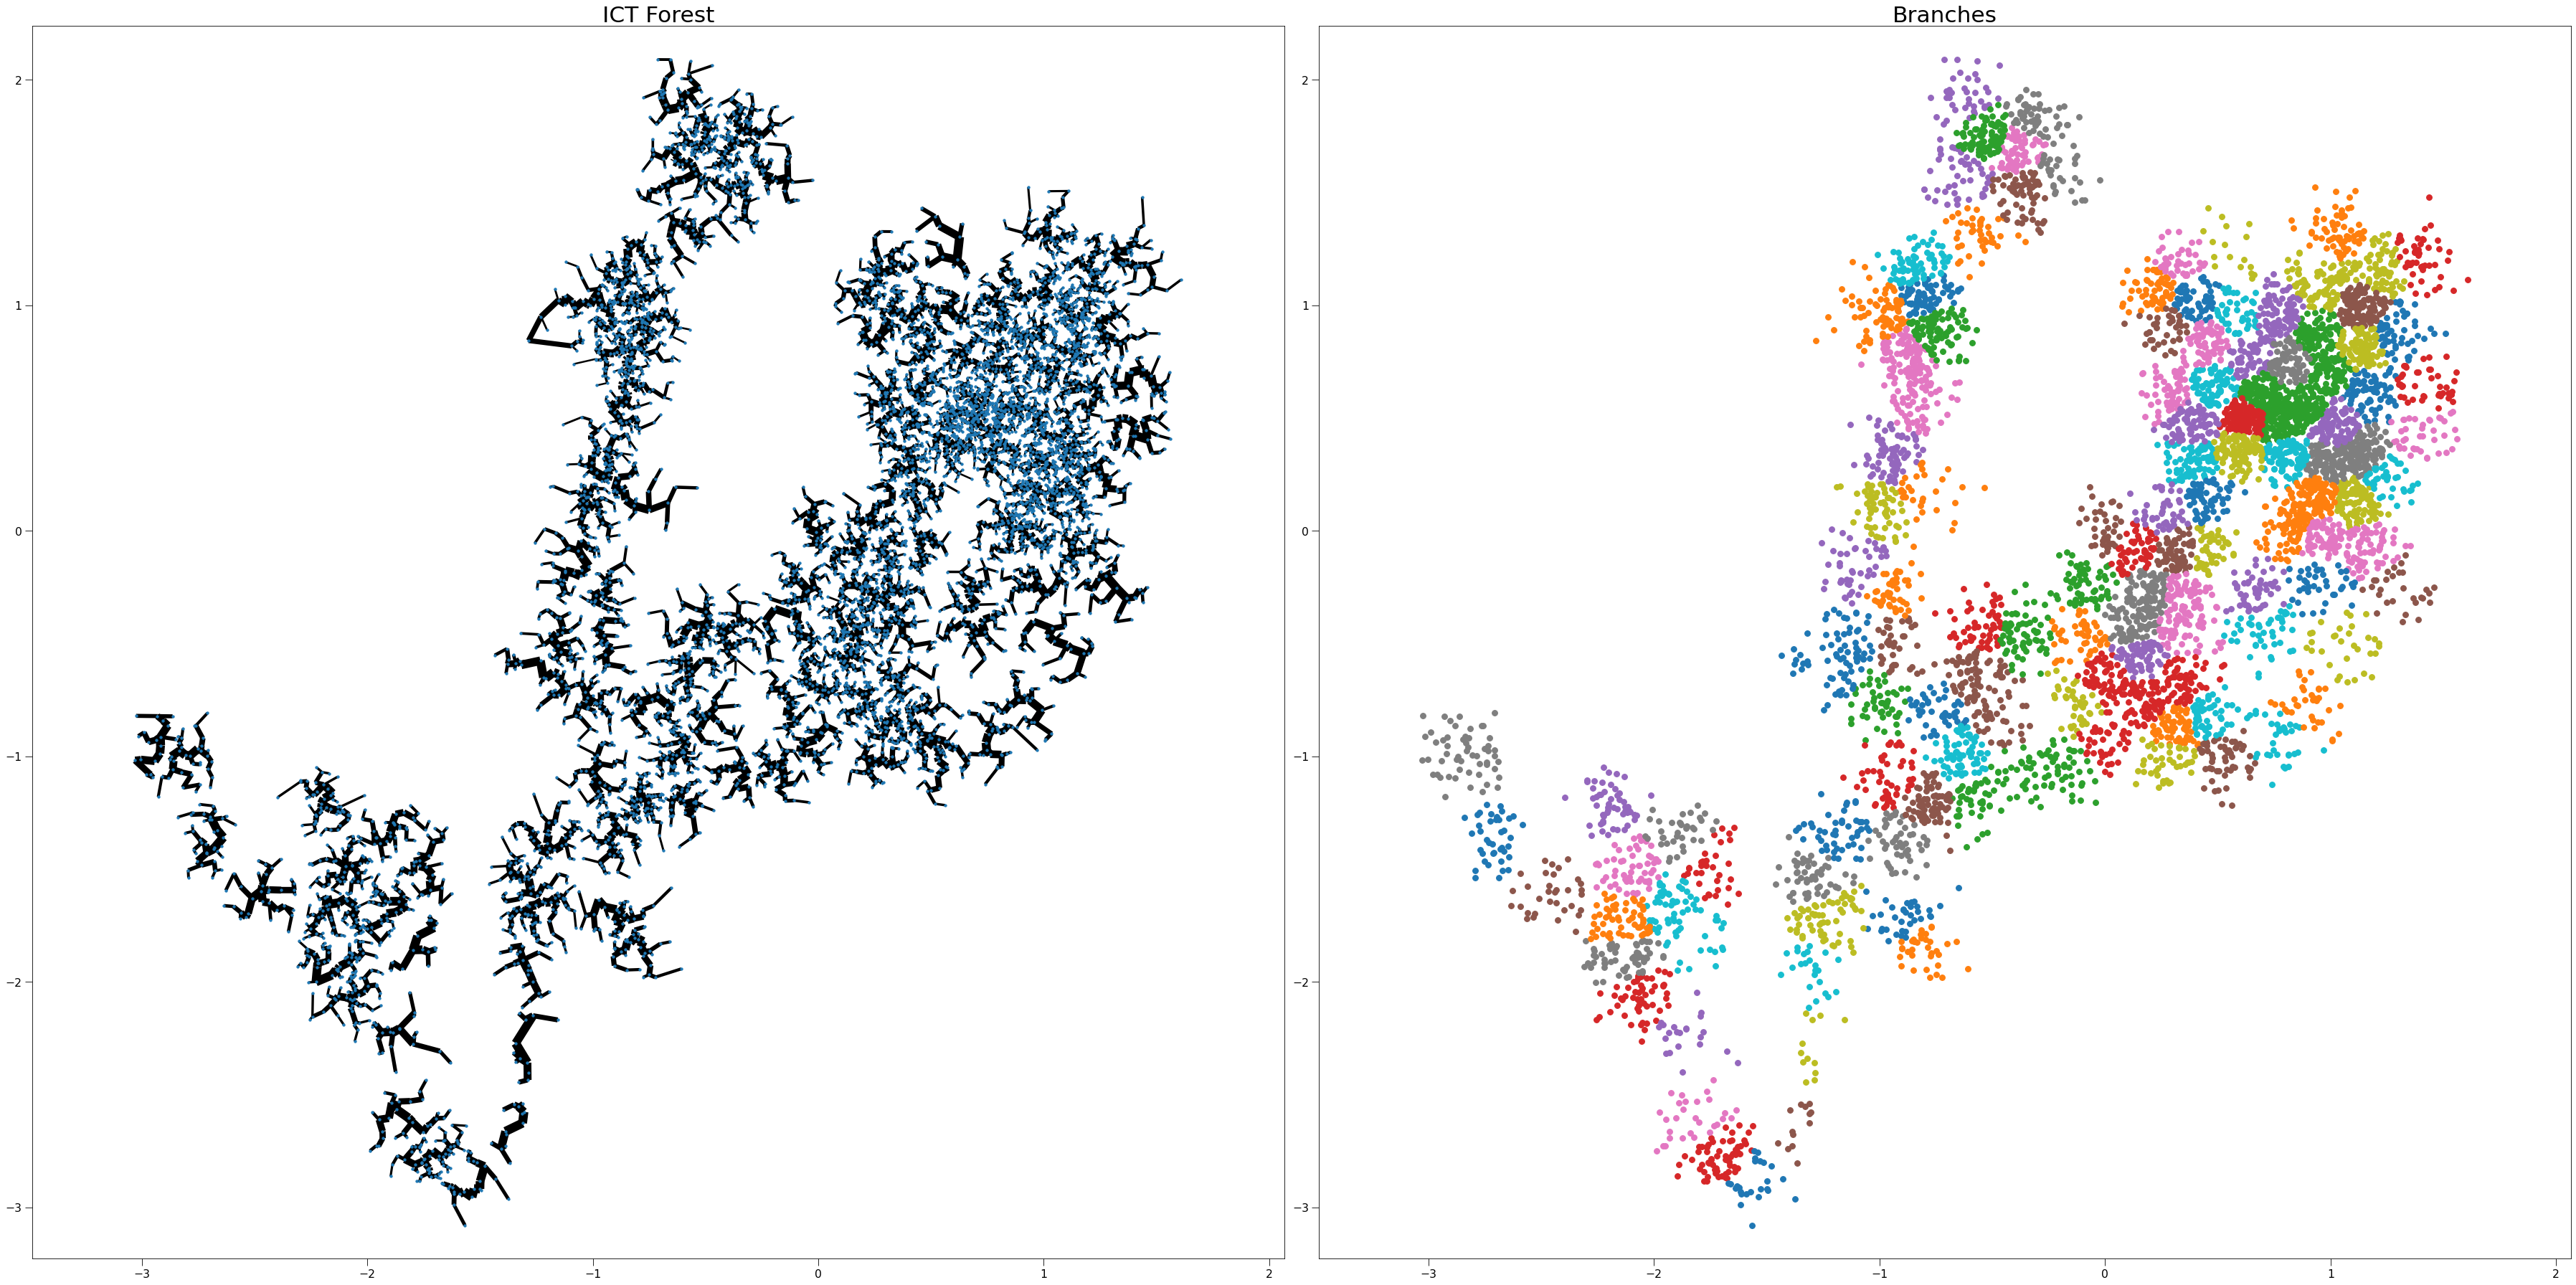

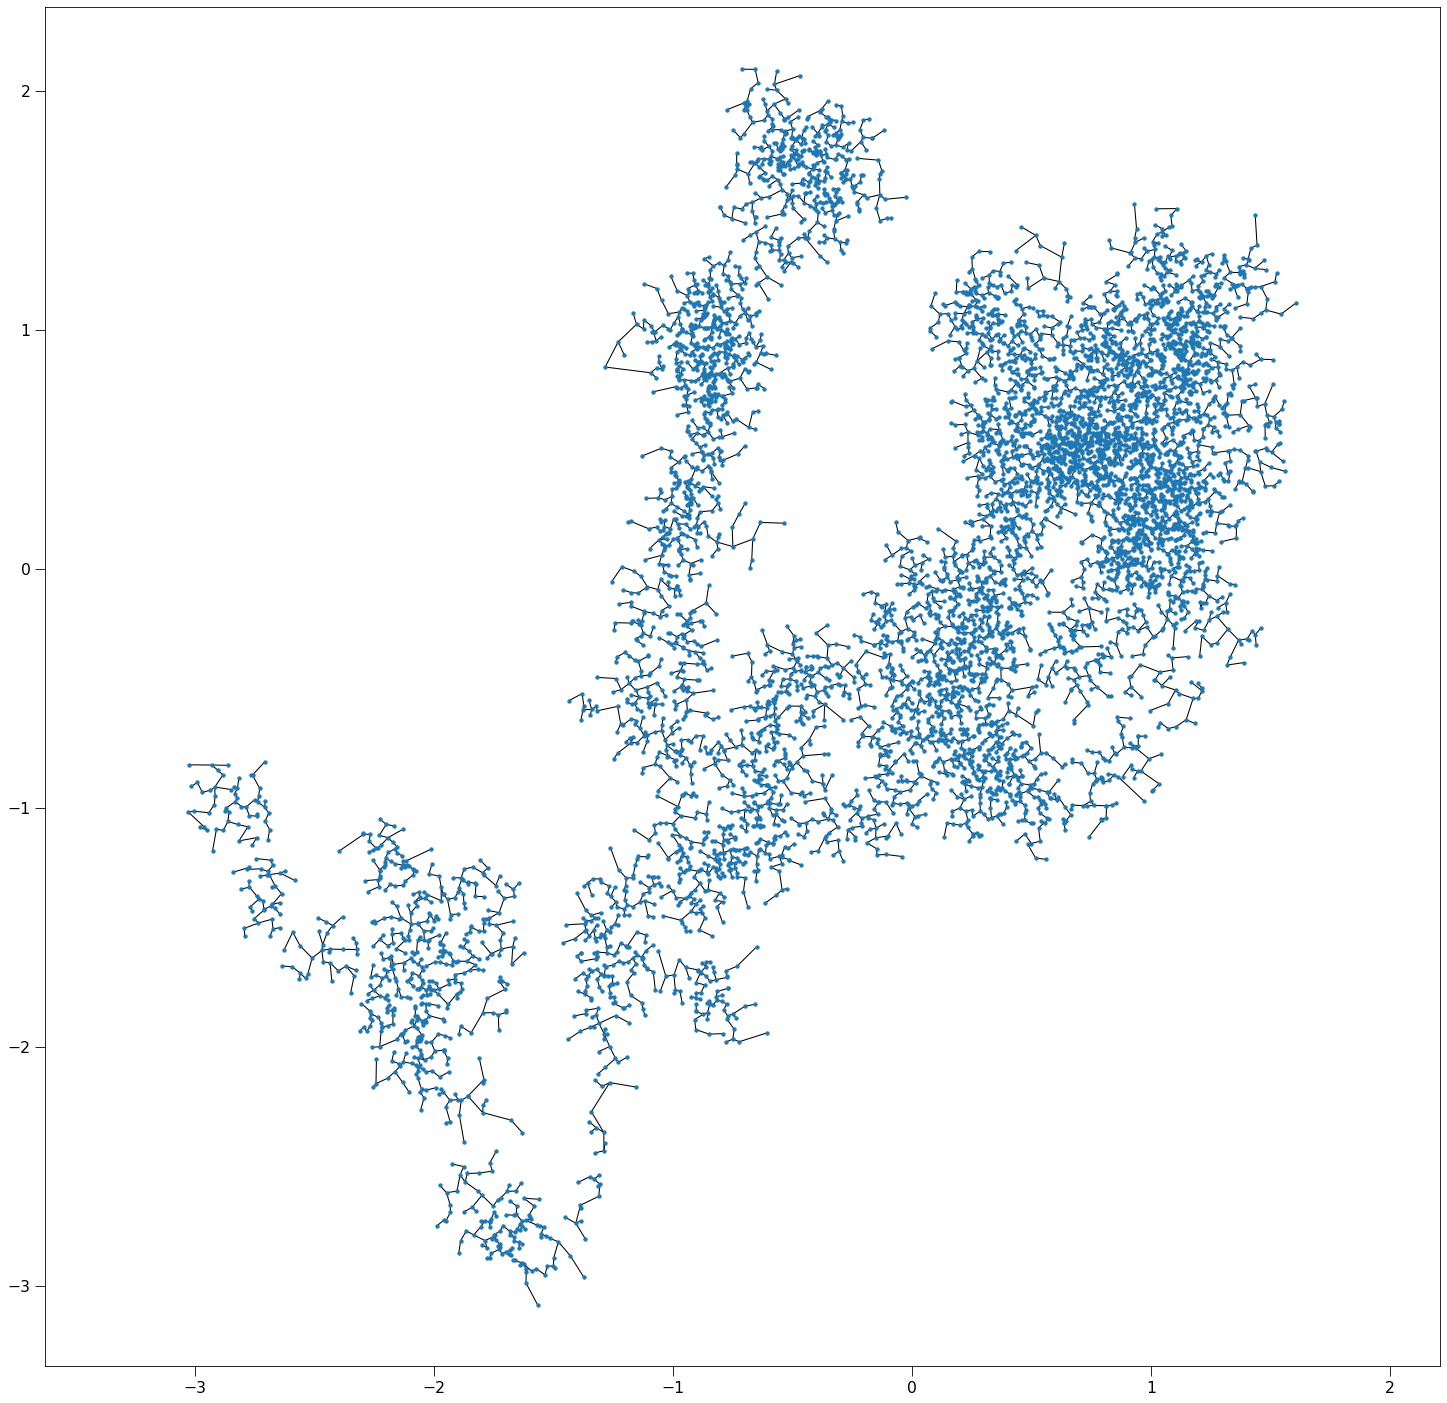

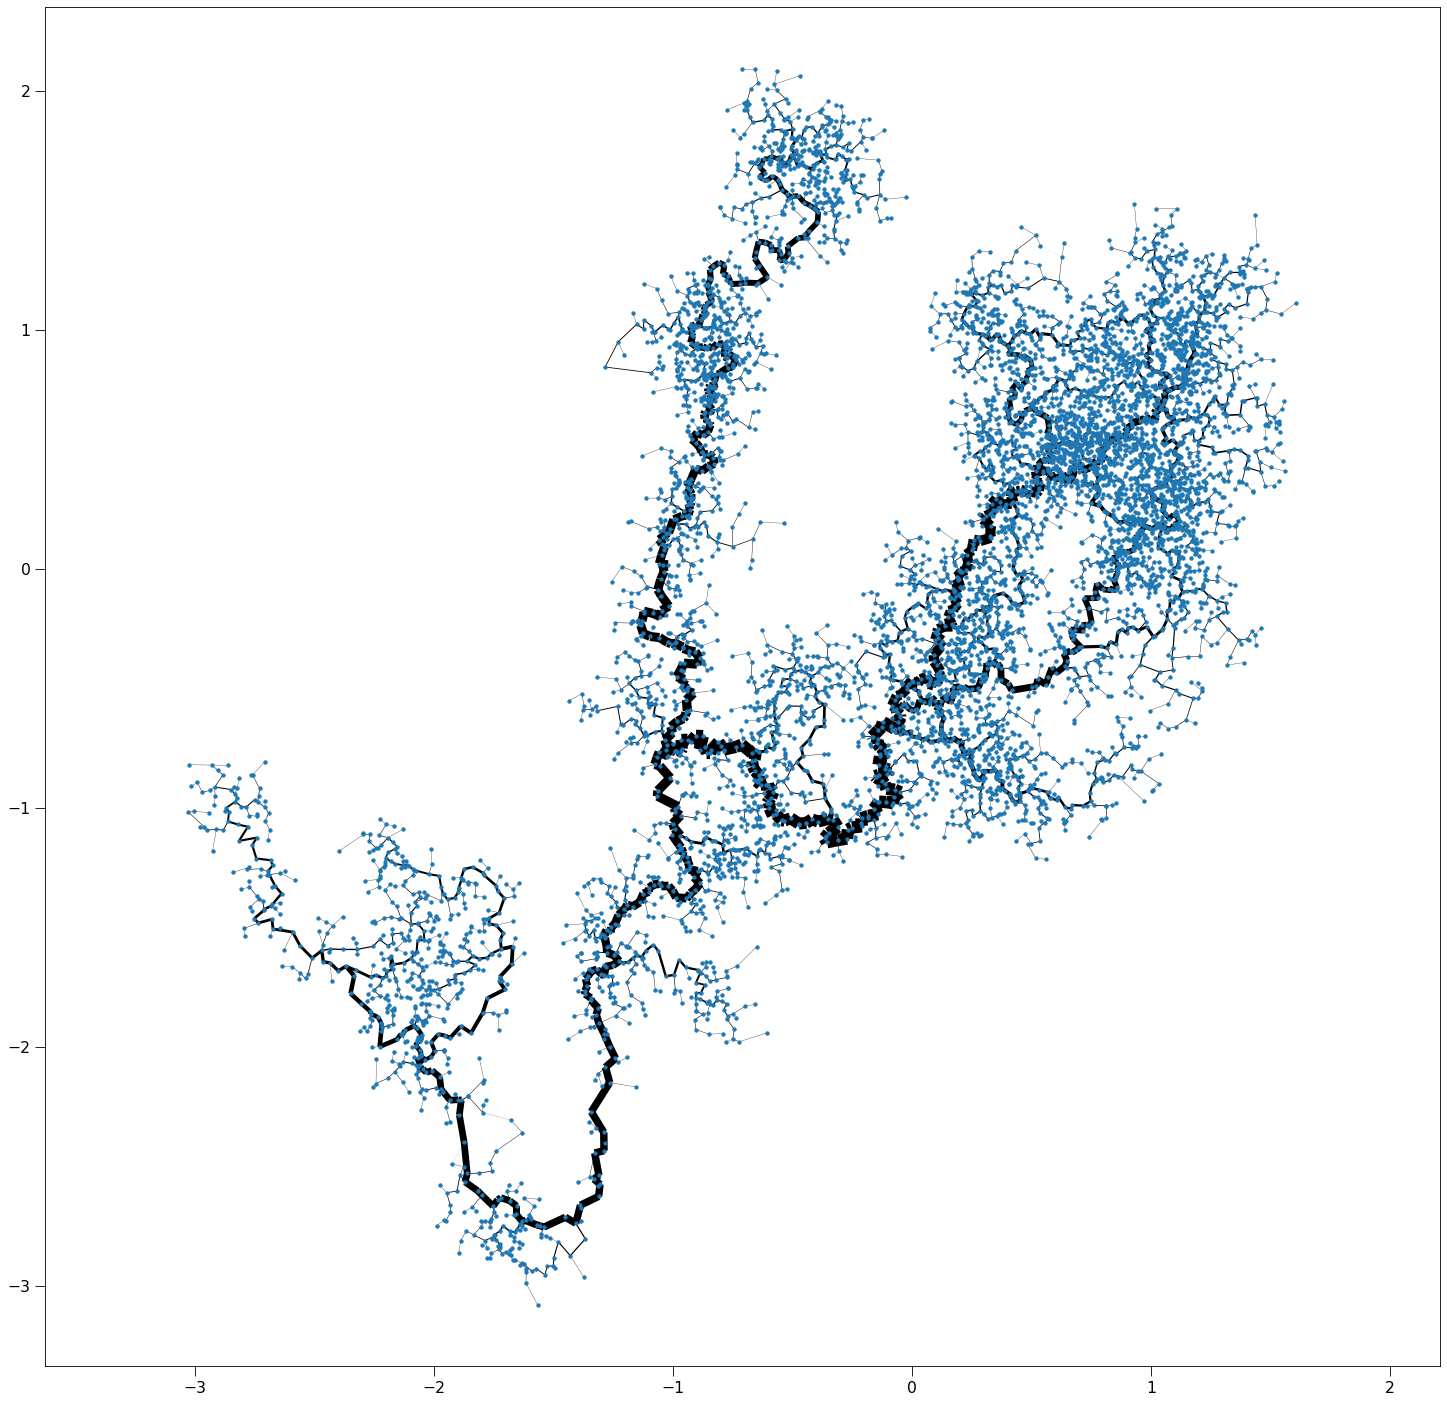

In [4]:
graphs = sub_ICTs
widths = []
for sub_ICT in sub_ICTs:
    widths.append(compute_widths(sub_ICT))
    
names = ["ICT Forest", "Branches"]

number_of_plots = 2
fig, ax = plt.subplots(1,2, figsize=(24*2,24))

for i, component in enumerate(components):
    nk.viztasks.drawGraph(graphs[i], pos=position[component], ax=ax[0], width=widths[i], node_size=10)
            

for component in components:
    ax[1].plot(*position[component].T)
    
for i, name in enumerate(names):
    ax[i].set_title(name)
    ax[i].axis("equal")
    ax[i].tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    ax[i].set_axis_on()
    
    
plt.tight_layout()
plt.show()

from External.create_k_nearest import patch_together
from sklearn.metrics import pairwise_distances

G = nk.graph.Graph(n=len(position), weighted=True)

distances = pairwise_distances(position, position)

for component, sub_ICT in zip(components, sub_ICTs):
    for u, v, w in sub_ICT.iterEdgesWeights():
        nodeA = component[u]
        nodeB = component[v]
        G.addEdge(nodeA, nodeB, distances[nodeA, nodeB])
        
# plot the not connected graph
fig, ax = plt.subplots(1, figsize=(24,24))
nk.viztasks.drawGraph(G, pos=position, ax=ax, node_size=10)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_axis_on()
ax.axis("equal")
plt.show()

G = patch_together(G, position, bridges=4)
G.indexEdges()

# plot the not connected graph
fig, ax = plt.subplots(1, figsize=(24,24))
nk.viztasks.drawGraph(G, pos=position, ax=ax, width=compute_widths(G), node_size=10)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_axis_on()
ax.axis("equal")
plt.show()

In [5]:
# calculate the cluster ICT with all aim nodes
start = time.time()
ICT_cluster_all = calculate_ICT(G, algorithm_type="cluster_all", cluster_centers=cluster_centers,
                                zeros_stay_zeros=True, update_G=1.1)
ICT_cluster_all.indexEdges()

# widths of the edges
widths_cluster_all = compute_widths(ICT_cluster_all)
print(time.time()-start)

update Arr 7741 -> 7508
added 1990 edges early
update Arr 7508 -> 7507
update Arr 7507 -> 7507
update Arr 7507 -> 7507
update Arr 7507 -> 7507
update Arr 7507 -> 7507
update Arr 7507 -> 7507
update Arr 7507 -> 7507
update Arr 7507 -> 7507
update Arr 7507 -> 7506
update Arr 7506 -> 7506
update Arr 7506 -> 7506
update Arr 7506 -> 7506
update Arr 7506 -> 7506
update Arr 7506 -> 7506
update Arr 7506 -> 7506
update Arr 7506 -> 7506
update Arr 7506 -> 7505
update Arr 7505 -> 7505
update Arr 7505 -> 7504
update Arr 7504 -> 7504
update Arr 7504 -> 7504
update Arr 7504 -> 7504
update Arr 7504 -> 7504
update Arr 7504 -> 7504
update Arr 7504 -> 7504
update Arr 7504 -> 7503
update Arr 7503 -> 7503
update Arr 7503 -> 7503
update Arr 7503 -> 7503
update Arr 7503 -> 7503
update Arr 7503 -> 7502
added 2 edges early
update Arr 7502 -> 7502
update Arr 7502 -> 7501
update Arr 7501 -> 7501
update Arr 7501 -> 7501
update Arr 7501 -> 7501
update Arr 7501 -> 7501
update Arr 7501 -> 7501
update Arr 7501 -> 74

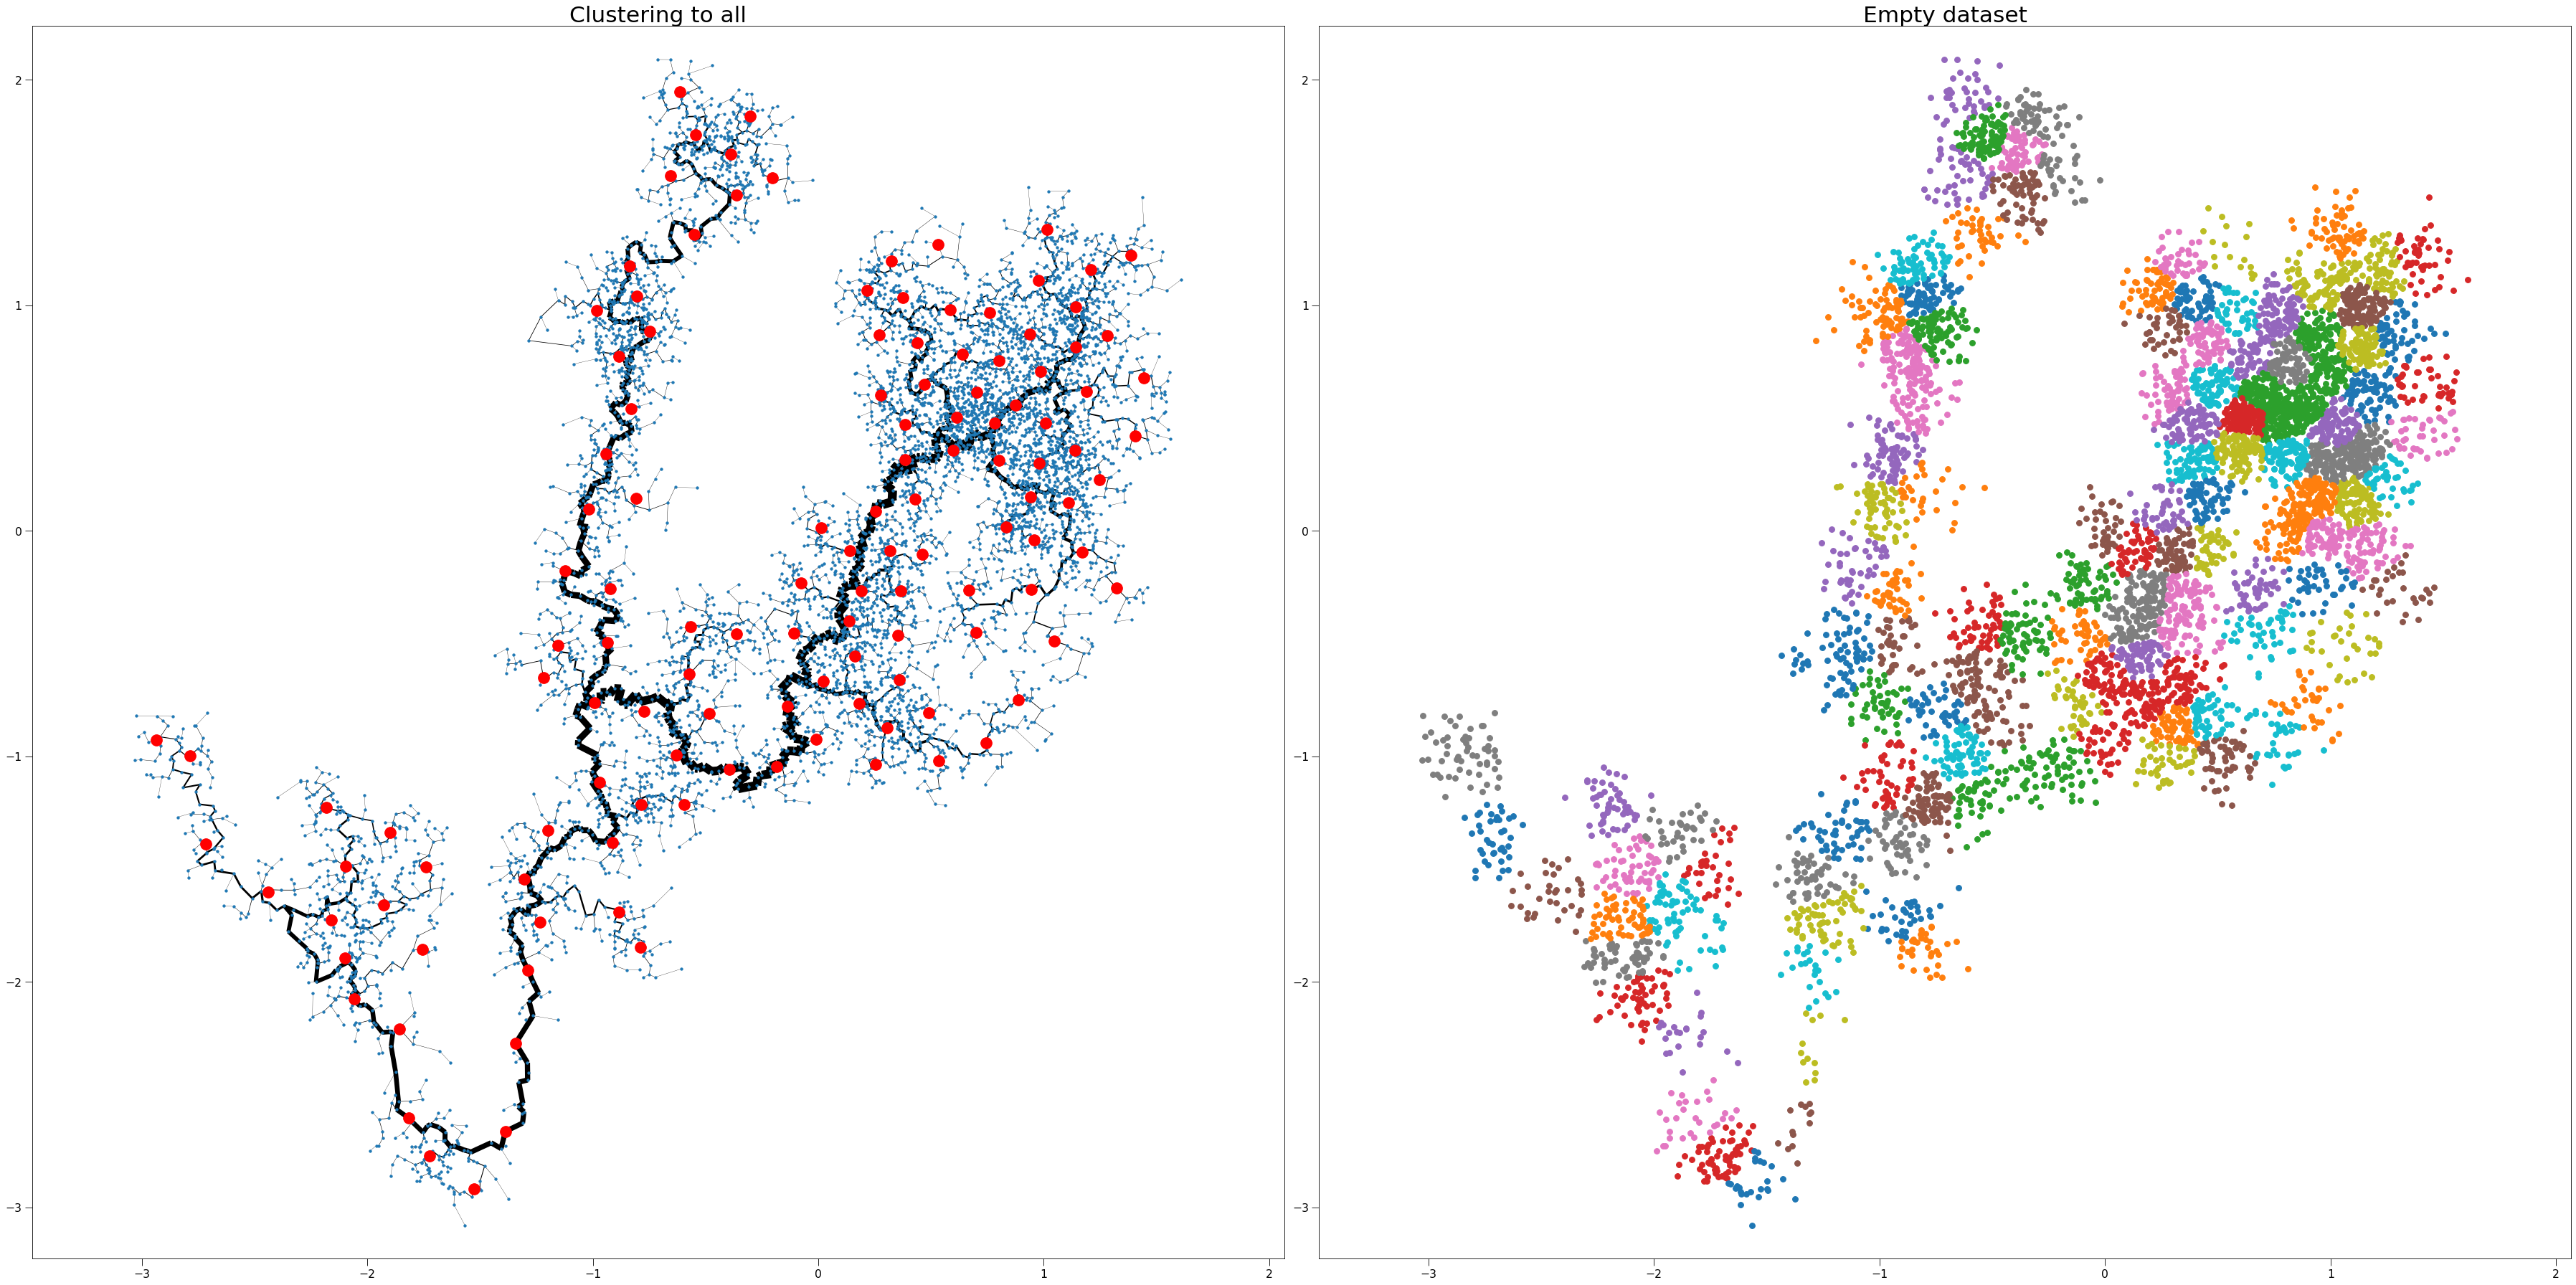

In [6]:
# plotting
graphs = [ICT_cluster_all]
widths = [widths_cluster_all]
names = ["Clustering to all", "Empty dataset"]


number_of_plots = len(names)
fig, ax = plt.subplots(1,2, figsize=(24*2,24))

if number_of_plots == 1:
    ax = [ax]
    
for i in range(number_of_plots):
    if i == 0:
        nk.viztasks.drawGraph(graphs[i], pos=position, ax=ax[i], width=widths[i], node_size=10)
        ax[i].tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
        ax[i].plot(*position[cluster_centers].T, marker="o", color = "Red")
        ax[i].set_axis_on()
    else:
        for label in range(len(labels)):
            plt.plot(*position[np.argwhere(labels == label).T[0]].T, label=label)
    ax[i].set_title(names[i])
    ax[i].axis("equal")
    
plt.tight_layout()
plt.savefig("./Output/Images/2D-phate-11-1_25-1.png")
plt.show()